In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns = ['RowNumber','CustomerId','Surname'], inplace=True )

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [14]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [17]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()

# 1 i/p, 2 hidden and 1 o/p layer

model.add(Dense(11,activation='relu',input_dim=11))  # Ist hidden layer - having 11 nodes
model.add(Dense(11,activation='relu'))  # 2nd hidden layer - also having 11 nodes
model.add(Dense(1,activation='sigmoid'))   #  output layer - having one node
 

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
history = model.fit(X_train_scaled,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
200/200 [==============================] - 4s 8ms/step - loss: 0.5468 - accuracy: 0.7666 - val_loss: 0.4935 - val_accuracy: 0.7975
Epoch 2/200
200/200 [==============================] - 1s 5ms/step - loss: 0.4575 - accuracy: 0.8025 - val_loss: 0.4445 - val_accuracy: 0.8069
Epoch 3/200
200/200 [==============================] - 1s 5ms/step - loss: 0.4313 - accuracy: 0.8130 - val_loss: 0.4281 - val_accuracy: 0.8169
Epoch 4/200
200/200 [==============================] - 1s 5ms/step - loss: 0.4213 - accuracy: 0.8233 - val_loss: 0.4204 - val_accuracy: 0.8194
Epoch 5/200
200/200 [==============================] - 1s 5ms/step - loss: 0.4149 - accuracy: 0.8263 - val_loss: 0.4140 - val_accuracy: 0.8181
Epoch 6/200
200/200 [==============================] - 1s 5ms/step - loss: 0.4089 - accuracy: 0.8300 - val_loss: 0.4088 - val_accuracy: 0.8219
Epoch 7/200
200/200 [==============================] - 1s 5ms/step - loss: 0.4024 - accuracy: 0.8344 - val_loss: 0.4026 - val_accuracy: 0.8263

Epoch 58/200
200/200 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8672 - val_loss: 0.3473 - val_accuracy: 0.8575
Epoch 59/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3214 - accuracy: 0.8653 - val_loss: 0.3452 - val_accuracy: 0.8562
Epoch 60/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3210 - accuracy: 0.8659 - val_loss: 0.3464 - val_accuracy: 0.8550
Epoch 61/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3209 - accuracy: 0.8658 - val_loss: 0.3468 - val_accuracy: 0.8556
Epoch 62/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3208 - accuracy: 0.8652 - val_loss: 0.3484 - val_accuracy: 0.8550
Epoch 63/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3204 - accuracy: 0.8662 - val_loss: 0.3468 - val_accuracy: 0.8581
Epoch 64/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3207 - accuracy: 0.8664 - val_loss: 0.3472 - val_accuracy:

Epoch 115/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3140 - accuracy: 0.8691 - val_loss: 0.3551 - val_accuracy: 0.8581
Epoch 116/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3141 - accuracy: 0.8695 - val_loss: 0.3554 - val_accuracy: 0.8569
Epoch 117/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3139 - accuracy: 0.8700 - val_loss: 0.3545 - val_accuracy: 0.8587
Epoch 118/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3146 - accuracy: 0.8678 - val_loss: 0.3540 - val_accuracy: 0.8556
Epoch 119/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3137 - accuracy: 0.8691 - val_loss: 0.3545 - val_accuracy: 0.8556
Epoch 120/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3150 - accuracy: 0.8695 - val_loss: 0.3534 - val_accuracy: 0.8569
Epoch 121/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3133 - accuracy: 0.8700 - val_loss: 0.3557 - val_ac

200/200 [==============================] - 1s 5ms/step - loss: 0.3095 - accuracy: 0.8711 - val_loss: 0.3558 - val_accuracy: 0.8562
Epoch 172/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3093 - accuracy: 0.8728 - val_loss: 0.3576 - val_accuracy: 0.8569
Epoch 173/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3096 - accuracy: 0.8705 - val_loss: 0.3563 - val_accuracy: 0.8569
Epoch 174/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3097 - accuracy: 0.8712 - val_loss: 0.3572 - val_accuracy: 0.8544
Epoch 175/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3095 - accuracy: 0.8687 - val_loss: 0.3565 - val_accuracy: 0.8562
Epoch 176/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3092 - accuracy: 0.8702 - val_loss: 0.3571 - val_accuracy: 0.8544
Epoch 177/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3096 - accuracy: 0.8706 - val_loss: 0.3572 - val_accuracy: 0.8562

In [23]:
model.layers[0].get_weights()  # to get the value of weights and biases of Ist layer

[array([[-0.05105304,  0.09146426,  0.6179551 , -0.09537887, -0.26728687,
          0.01207972,  0.2592834 , -0.06110733,  0.04438668,  0.15571   ,
         -0.67826957],
        [-0.21487069,  1.1125541 , -0.59409165,  1.1055965 , -0.49551094,
          0.4174914 ,  0.6992901 , -0.3636595 , -0.03916033, -0.5063486 ,
         -0.29595336],
        [ 0.08681451, -0.18549763, -0.57259226,  0.04261288,  0.31577992,
          0.08172096, -0.17547798,  0.13916919, -0.51200765,  0.27548188,
          0.35833862],
        [-1.3026357 ,  0.06167253,  0.35747463,  0.31209177, -0.11610477,
          0.04319294,  0.25196353,  0.01826837,  0.613633  ,  0.12994729,
          0.77875316],
        [ 0.19064179, -0.60339296,  0.03822095,  0.23643151, -0.10412225,
          1.1419944 ,  0.3234104 ,  1.264606  ,  0.43800515, -0.50298625,
          0.84466106],
        [-0.06637497, -0.15501335,  0.4229056 , -0.11428563,  0.45790014,
          0.09921259,  0.18163326,  0.22683538, -0.3010601 , -0.3008442

In [24]:
model.layers[1].get_weights()  # to get the value of weights and biases of 2nd layer

[array([[ 0.58898723,  0.49759257, -0.1953064 , -1.4724052 , -0.84217787,
          1.0782284 , -0.66914004, -0.3795739 ,  0.31975403,  0.42691836,
         -0.4019254 ],
        [ 0.07413829, -0.2628244 , -0.26420337, -0.5631405 , -0.11103344,
         -0.3063745 , -0.01422837, -1.312044  , -0.25869334, -0.523953  ,
          0.876137  ],
        [-1.1397836 , -0.4976256 ,  0.59631896,  0.17224292, -0.06451677,
          0.0181589 , -0.5339364 , -0.36206385,  0.76237154, -0.26003468,
         -0.37390447],
        [ 0.90687096, -0.56111825, -1.0915339 ,  0.85304314,  0.56786007,
         -0.54323035, -0.15563655,  0.6061582 , -0.90573615,  0.4355764 ,
         -0.6501616 ],
        [ 0.03706359, -0.2635978 ,  0.23345725, -3.5680494 ,  0.2102641 ,
         -0.52050316,  0.29141903,  0.24559268,  0.11069216, -0.2662559 ,
         -0.2084309 ],
        [-0.11177298, -0.21585841, -0.38002825,  0.2174466 ,  0.15335093,
         -0.49600607, -1.15618   ,  1.3877273 ,  0.1741147 , -0.3374340

In [25]:
model.layers[2].get_weights()  # to get the value of weights and biases of 3rd layer

[array([[-1.1276783 ],
        [-0.8162361 ],
        [-0.65953463],
        [ 1.9419125 ],
        [-0.6161197 ],
        [-3.7907193 ],
        [-0.99968857],
        [ 1.1725291 ],
        [-0.32040486],
        [-1.0404851 ],
        [ 1.3104529 ]], dtype=float32),
 array([0.5513055], dtype=float32)]

In [26]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 3ms/step


In [27]:
y_log

array([[0.00273029],
       [0.06738338],
       [0.0251634 ],
       ...,
       [0.0186428 ],
       [0.05954982],
       [0.74193895]], dtype=float32)

In [28]:
y_pred = np.where(y_log>0.5,1,0)

In [29]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8615

In [31]:
import matplotlib.pyplot as plt

In [32]:
history.history

{'loss': [0.5468316078186035,
  0.4575057923793793,
  0.43132713437080383,
  0.42128491401672363,
  0.4148945212364197,
  0.40894606709480286,
  0.40235939621925354,
  0.39678341150283813,
  0.39022108912467957,
  0.3829161524772644,
  0.3744357228279114,
  0.3663989007472992,
  0.35987842082977295,
  0.35475459694862366,
  0.35058704018592834,
  0.348023921251297,
  0.3456569314002991,
  0.34419602155685425,
  0.3429482579231262,
  0.342041552066803,
  0.340437114238739,
  0.3402349352836609,
  0.3393428325653076,
  0.3381515443325043,
  0.33718541264533997,
  0.3363131284713745,
  0.3358789384365082,
  0.33469337224960327,
  0.33440640568733215,
  0.3336876928806305,
  0.3328007757663727,
  0.33217182755470276,
  0.331755667924881,
  0.33093398809432983,
  0.33034899830818176,
  0.33003348112106323,
  0.3296276926994324,
  0.3287000358104706,
  0.327927827835083,
  0.32780659198760986,
  0.32737067341804504,
  0.32686352729797363,
  0.3263629972934723,
  0.3257598578929901,
  0.32515

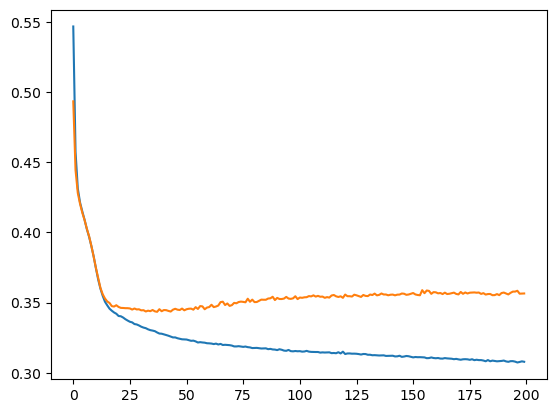

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

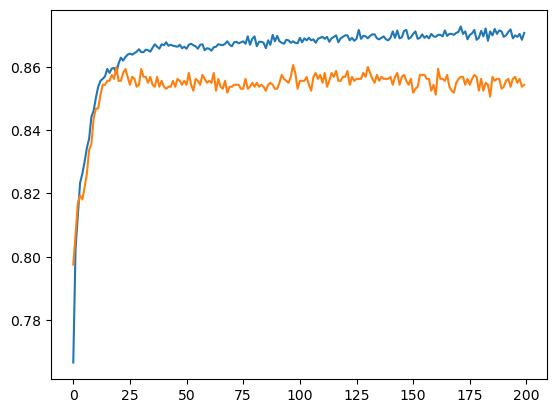

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])